## Setup
We do the following steps
1. Generate a synthetic dataset with 100 samples (for example one single user) with two dimensions.
We use a random_state of zero, to make sure the data is always generated the same way.
2. We do some data exploration 
3. We create an elbow plot to determine the amount of clusters for KMeans
3. Cluster with using KMeans / AP and DBSCAN and evaluate the differences 

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.60, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X, y_true)

1. First plot the distribution of the data
2. Then scatter plot

In [4]:
import pandas as pd 

df = pd.DataFrame(X)
df.head()

,0,1
0,0.516255,-0.707227
1,-0.861664,1.329068
2,0.711174,0.437049
3,-0.619792,1.485573
4,0.782282,-0.801378


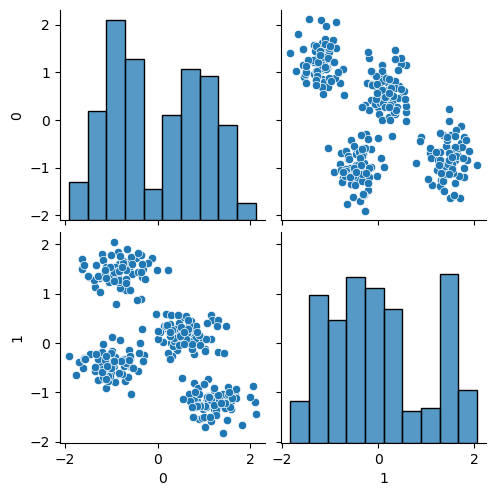

In [5]:
import seaborn as sns

sns.pairplot(df)
plt.show()

## Elbow plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


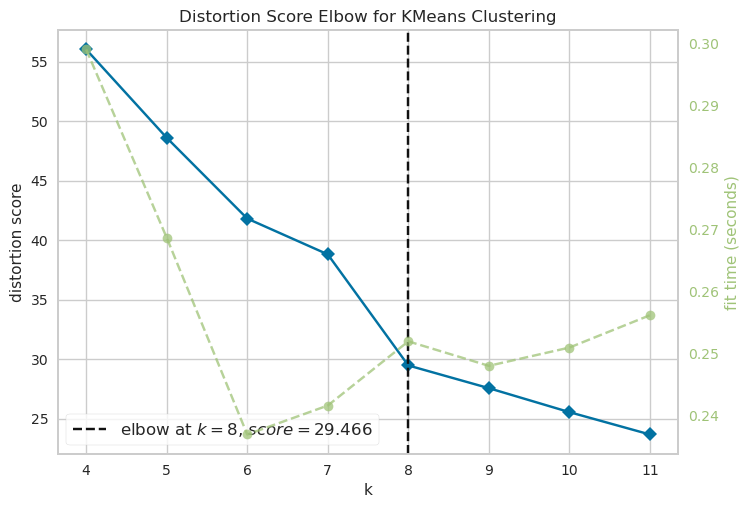

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(init='random')
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

In [7]:
kmeans = KMeans(n_clusters=9, random_state=0, init="random")
y_kmeans = kmeans.fit(df)
centroids = kmeans.cluster_centers_


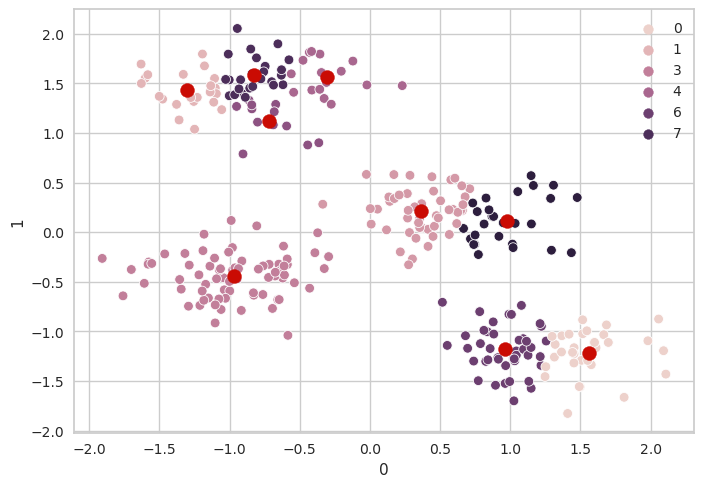

In [9]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:,1], hue=y_kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='r')
plt.show()

## Affinity propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(affinity='euclidean', random_state=0).fit(df)
labels = ap.labels_
centers = df.iloc[ap.cluster_centers_indices_]

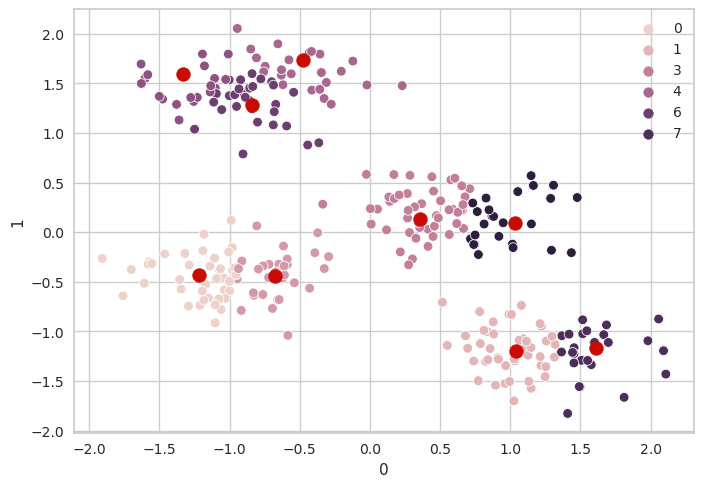

In [ ]:
sns.scatterplot(x=0, y=1, data=df, hue=labels)
plt.scatter(centers[0], centers[1], s=100, c='r')
plt.show()

## DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbscan.fit(X)

labels = dbscan.labels_
centers = df.groupby(labels).mean()

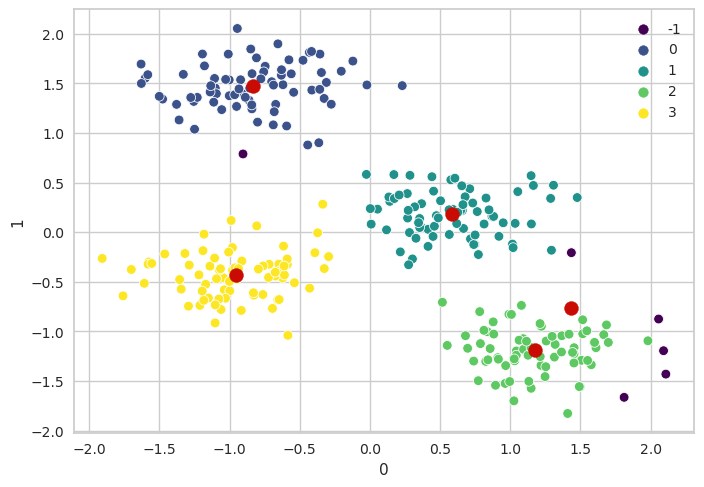

In [ ]:
sns.scatterplot(x=0, y=1, data=df, hue=labels, palette='viridis')
plt.scatter(centers.iloc[:, 0], centers.iloc[:, 1], s=100, c='r')
plt.show()